## Spotify Project - Data & EDA
This notebook is to clean the data and complete EDA.

In [163]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

1. Read in the data set from Kaggle. (https://www.kaggle.com/mrmorj/dataset-of-songs-in-spotify)

In [164]:
df = pd.read_csv('./data/genres_v2.csv')
df.head()

C:\Users\Bermonster\anaconda3\envs\GA\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


2. Check for null values and drop columns.

In [165]:
df.isnull().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
Unnamed: 0          21525
title               21525
dtype: int64

In [166]:
df.shape

(42305, 22)

The columns Unnamed: 0, is a left over index from the data that needs to be dropped.

In [167]:
df.drop(columns= ['Unnamed: 0'], inplace=True)

The song title and song name contain alot of null values, in order to prep them for modeling and not lose this data I
will look further into these two columns.

In [168]:
titles = df[df['title'].notnull()]
titles['song_name'].unique()


array([nan], dtype=object)

In [169]:
song_name = df[df['song_name'].notnull()]
song_name['title'].unique()

array([nan], dtype=object)

This bit of code shows that the song name and title columns can be combined as there are no songs with a title and a
song_name.

In [170]:
# https://stackoverflow.com/questions/41449555/pandas-combine-two-columns-with-null-values
df['song_name'] = df['song_name'].fillna(df['title'])
df.drop(columns= 'title', inplace=True)

df.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id                  0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
genre               0
song_name           6
dtype: int64

There are still 6 null values for song_name as these could be untitled, I am converting the nan values to empty strings.

In [171]:
df.fillna('', inplace= True)

The song names cannot be modeled as they are simple strings.  I will need to extract numerical value from the song
titles by looking at the character and word counts.

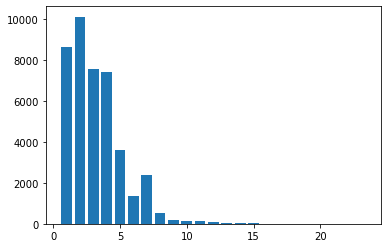

In [172]:
df['song_name_char_count'] = [len(song) for song in df['song_name']]
df['song_name_word_count'] = [len(song.split(' ')) for song in df['song_name']]

plt.bar(height= df.song_name_word_count.value_counts(), x = df.song_name_word_count.value_counts().index);

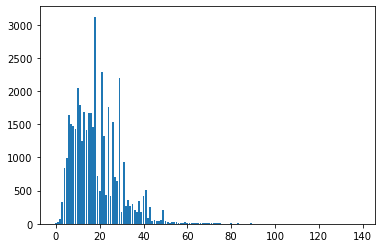

In [173]:
plt.bar(height= df.song_name_char_count.value_counts(), x = df.song_name_char_count.value_counts().index);

3. Check data types and correct any issues within dataset

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   danceability          42305 non-null  float64
 1   energy                42305 non-null  float64
 2   key                   42305 non-null  int64  
 3   loudness              42305 non-null  float64
 4   mode                  42305 non-null  int64  
 5   speechiness           42305 non-null  float64
 6   acousticness          42305 non-null  float64
 7   instrumentalness      42305 non-null  float64
 8   liveness              42305 non-null  float64
 9   valence               42305 non-null  float64
 10  tempo                 42305 non-null  float64
 11  type                  42305 non-null  object 
 12  id                    42305 non-null  object 
 13  uri                   42305 non-null  object 
 14  track_href            42305 non-null  object 
 15  analysis_url       

4. Check value distributions of object type columns.

>Column: type

In [175]:
df.type.value_counts()

#all data has the same type so I am dropping this column.
df.drop(columns='type', inplace=True)

> Column: id

In [176]:
df.id.value_counts()

7D5qMGajdfznFcXFArk5VE    9
5lXY6PTuWXOludKy4zDQwM    8
3BSuC9Y6MhalaLlhyNbTYZ    8
5cRDn5aGMLvWsldoRmOOz0    8
7CN6ZYIX338ekn7pb2CpQp    7
                         ..
4zGR5STPmZ3yYSv8qlWCjt    1
1ljgatC8POOTcs1MlcA3sZ    1
7KkmqHUFkMS2ry2MOwvh5b    1
7rFe0uEHuONOTavUfaxEcS    1
7fDRxj6cCQRtdxacSytsYb    1
Name: id, Length: 35877, dtype: int64

These are string ids for the songs in the dataset.  These values should be dropped as there are too many unique values
that will make the model over fit.

In [177]:
# df.drop(columns='id', inplace= True)

> Column: uri

In [178]:
df.uri.value_counts()

spotify:track:7D5qMGajdfznFcXFArk5VE    9
spotify:track:3BSuC9Y6MhalaLlhyNbTYZ    8
spotify:track:5cRDn5aGMLvWsldoRmOOz0    8
spotify:track:5lXY6PTuWXOludKy4zDQwM    8
spotify:track:2KVv2zAjDHxymySY5EIaAz    7
                                       ..
spotify:track:08fhbfRSg7eEH0IZT7pB6a    1
spotify:track:03B5oc8ziHxyelcRqw9AB6    1
spotify:track:4QUA94c3ycZm8dnpPih4sf    1
spotify:track:065bY5WrLvI3NN9VCK0QLe    1
spotify:track:1UVffD20CfHJ2wD0x0as8L    1
Name: uri, Length: 35877, dtype: int64

This column contains similar data as in the id column.  This coulmn should be dropped as well to prevent creating too
many features when dummying the columns.

In [179]:
df.drop(columns='uri', inplace= True)

> Column: track_href

track_href is the url for the specific track. This column will not make give good data fro the model and will be dropped.

In [180]:
df.drop(columns='track_href', inplace= True)

> Column: analysis_url

In [181]:
df.analysis_url.value_counts()

https://api.spotify.com/v1/audio-analysis/7D5qMGajdfznFcXFArk5VE    9
https://api.spotify.com/v1/audio-analysis/5lXY6PTuWXOludKy4zDQwM    8
https://api.spotify.com/v1/audio-analysis/5cRDn5aGMLvWsldoRmOOz0    8
https://api.spotify.com/v1/audio-analysis/3BSuC9Y6MhalaLlhyNbTYZ    8
https://api.spotify.com/v1/audio-analysis/7CN6ZYIX338ekn7pb2CpQp    7
                                                                   ..
https://api.spotify.com/v1/audio-analysis/65jY2GXlBeRtQCZFjK8tLZ    1
https://api.spotify.com/v1/audio-analysis/4fkH79gfxgQgeA5D8JgpSN    1
https://api.spotify.com/v1/audio-analysis/1DVYrrb57sa9Qqt0V8Rov7    1
https://api.spotify.com/v1/audio-analysis/4ZWDapgN0TLOqkb7lZJICa    1
https://api.spotify.com/v1/audio-analysis/4bwRAPdSdJdg6n6RW98r0S    1
Name: analysis_url, Length: 35877, dtype: int64

This column contains similar data as in the track_href column.  This column should be dropped as well to prevent creating too
many features when dummying the columns.

In [182]:
df.drop(columns='analysis_url', inplace=True)

4. Check values of the numerical data in the data set.


In [183]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,song_name_char_count,song_name_word_count
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056,250865.846685,3.972580,18.852594,3.210590
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623,102957.713571,0.268342,10.763208,2.023564
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,25600.000000,1.000000,0.000000,1.000000
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000,179840.000000,4.000000,11.000000,2.000000
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000,224760.000000,4.000000,17.000000,3.000000
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000,301133.000000,4.000000,25.000000,4.000000
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000,913052.000000,5.000000,138.000000,23.000000


In [184]:
df.danceability.value_counts()

0.804    189
0.808    163
0.800    150
0.802    149
0.803    149
        ... 
0.131      1
0.167      1
0.111      1
0.194      1
0.959      1
Name: danceability, Length: 921, dtype: int64

These are percentage values the describe the danceability in the song.

In [185]:
df.energy.value_counts()

0.9770    188
0.9530    171
0.9560    168
0.9880    166
0.9700    166
         ... 
0.1140      1
0.1090      1
0.1780      1
0.1680      1
0.0587      1
Name: energy, Length: 955, dtype: int64

These are percentage values the describe the energy in the song.

In [186]:
df.key.value_counts()

1     7537
7     4275
11    4150
6     3714
0     3470
8     3345
9     3254
10    3251
2     3047
5     2994
4     2368
3      900
Name: key, dtype: int64

This is the key of the song denoted by numbers from 0-11. These are class like values and will need to be dummified to model as these values should not be treated like numbers.

In [187]:
df.loudness.describe()

count    42305.000000
mean        -6.465442
std          2.941165
min        -33.357000
25%         -8.161000
50%         -6.234000
75%         -4.513000
max          3.148000
Name: loudness, dtype: float64

These are numeric values that describe the loudness of the song.

In [188]:
df['mode'].value_counts()

1    23245
0    19060
Name: mode, dtype: int64

This is a column made up of ones and zeros depicting the mode of the song, where 1 is the song is on the major scale and
0 is not.

In [189]:
df.speechiness.describe()

count    42305.000000
mean         0.136561
std          0.126168
min          0.022700
25%          0.049100
50%          0.075500
75%          0.193000
max          0.946000
Name: speechiness, dtype: float64

These are numeric percentages that describe the speechiness quality of the song.

In [190]:
df.acousticness.describe()

count    42305.000000
mean         0.096160
std          0.170827
min          0.000001
25%          0.001730
50%          0.016400
75%          0.107000
max          0.988000
Name: acousticness, dtype: float64

These are numeric percentages that describe the acousticness percentage of the song.

In [191]:
df.instrumentalness.describe()

count    42305.000000
mean         0.283048
std          0.370791
min          0.000000
25%          0.000000
50%          0.005940
75%          0.722000
max          0.989000
Name: instrumentalness, dtype: float64

These are numeric percentages that describe the instrumental percentage of the song.

In [192]:
df.liveness.describe()

count    42305.000000
mean         0.214079
std          0.175576
min          0.010700
25%          0.099600
50%          0.135000
75%          0.294000
max          0.988000
Name: liveness, dtype: float64

These are numeric percentages that describe the liveness quality of the song.


In [193]:
df.valence.describe()

count    42305.000000
mean         0.357101
std          0.233200
min          0.018700
25%          0.161000
50%          0.322000
75%          0.522000
max          0.988000
Name: valence, dtype: float64

This is a percentage value that describes how happy a song sounds.

In [194]:
df.tempo.describe()

count    42305.000000
mean       147.474056
std         23.844623
min         57.967000
25%        129.931000
50%        144.973000
75%        161.464000
max        220.290000
Name: tempo, dtype: float64

In [195]:
df.duration_ms.describe()

count     42305.000000
mean     250865.846685
std      102957.713571
min       25600.000000
25%      179840.000000
50%      224760.000000
75%      301133.000000
max      913052.000000
Name: duration_ms, dtype: float64

These are the song durations in milliseconds. These are numeric values.

In [196]:
df.time_signature.value_counts()


4    40427
3     1219
5      509
1      150
Name: time_signature, dtype: int64

This is a class like integer that shows the time signature of the song.

Plot the distributions of the genres.

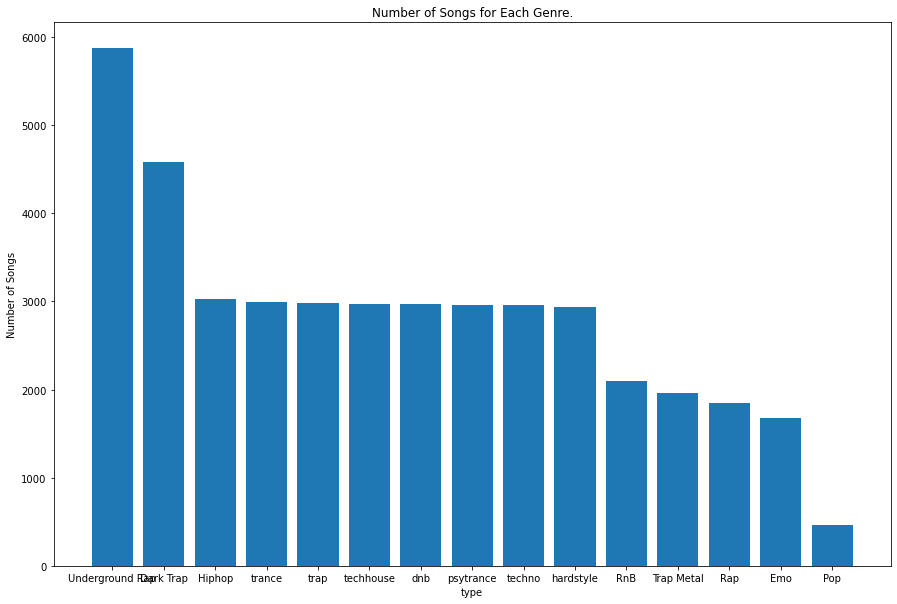

In [197]:
plt.figure(figsize=(15,10))
plt.bar(height=df['genre'].value_counts(), x = df['genre'].value_counts().index)
plt.xlabel('type')
plt.ylabel('Number of Songs')
plt.title('Number of Songs for Each Genre.')
plt.savefig('./imgs/Gernre_dist.png', dpi= 400)


### EDA

In [198]:
#sns.PairGrid(df[df['genre'] == 0])

In [199]:
#genre specific dataframes for use in eda
# df_0 = df[df['genre'] == 0]
# df_1 = df[df['genre'] == 1]
# df_2 = df[df['genre'] == 2]
# df_3 = df[df['genre'] == 3]
# df_4 = df[df['genre'] == 4]
# df_5 = df[df['genre'] == 5]
# df_6 = df[df['genre'] == 6]
# df_7 = df[df['genre'] == 7]
# df_8 = df[df['genre'] == 8]
# df_9 = df[df['genre'] == 9]
# df_10 = df[df['genre'] == 10]
# df_11 = df[df['genre'] == 11]
# df_12 = df[df['genre'] == 12]
# df_13 = df[df['genre'] == 13]
# df_14 = df[df['genre'] == 14]

df.groupby(by='genre').mean().index

Index(['Dark Trap', 'Emo', 'Hiphop', 'Pop', 'Rap', 'RnB', 'Trap Metal',
       'Underground Rap', 'dnb', 'hardstyle', 'psytrance', 'techhouse',
       'techno', 'trance', 'trap'],
      dtype='object', name='genre')

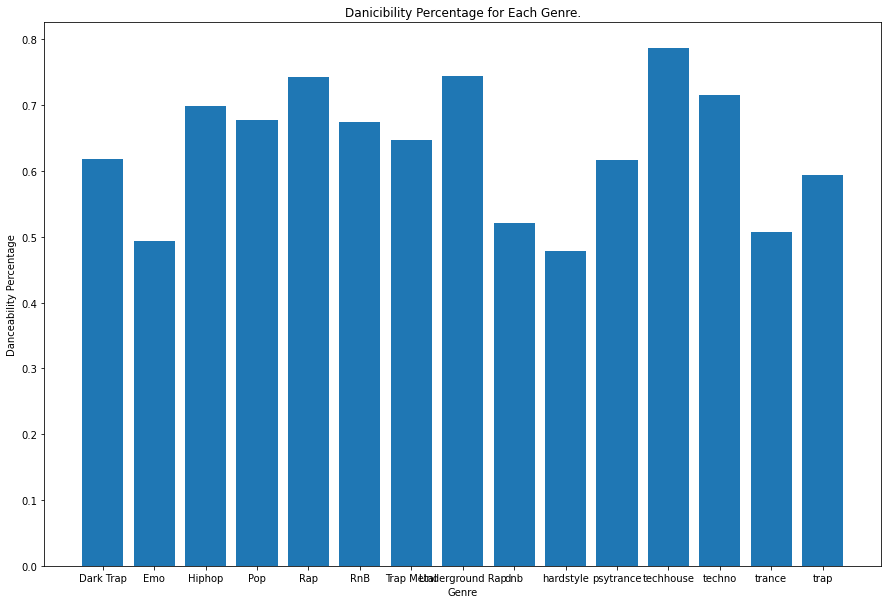

In [200]:
plt.figure(figsize=(15,10))
plt.bar(height= df.groupby(by='genre').mean()['danceability'], x = df.groupby(by='genre').mean().index)
plt.xlabel('Genre')
plt.ylabel('Danceability Percentage')
plt.title('Danicibility Percentage for Each Genre.')
plt.savefig('./imgs/danceability_dist.png', dpi= 400)

#### Prep Data for Modeling

1. Change target, genre, to be a numerical number instead of a string.  This is a method of integer encoding.

In [201]:
classes = list(df['genre'].unique())
#create dictionary of classes and the numerical number associated with each class.
target_dict = {classes[i]:i for i in range(len(classes))}
target_dict

#change target from strings to ints.

df['genre'] = df['genre'].replace(target_dict)

2. Create dummy columns for all non-numerical data. This will allow the model to use object-oriented data, as this
process creates columns where each unique object within the root columns is represented by either a one or zero.


In [202]:
df = pd.get_dummies(df, columns=['key','time_signature','mode'], drop_first= True)

3. Save file as clean_data.csv

In [203]:
df.to_csv('./data/clean_data.csv', index= False)